In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Cab Data Analysis

In [17]:
path_cab_data = "DataSets/Cab_Data.csv"
cab_data_df = pd.read_csv(path_cab_data)

In [18]:
cab_data_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [19]:
cab_data_df.shape

(359392, 7)

In [20]:
cab_data_df.iloc[1000: ,:]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1000,10001310,42372,Yellow Cab,WASHINGTON DC,33.66,702.50,444.3120
1001,10001311,42371,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120
1002,10001312,42375,Yellow Cab,WASHINGTON DC,6.36,128.69,82.4256
1003,10001313,42377,Yellow Cab,WASHINGTON DC,44.40,881.30,607.3920
1004,10001314,42379,Yellow Cab,WASHINGTON DC,23.52,457.79,321.7536
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [21]:
cab_data_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [22]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [23]:
cab_data_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [24]:
# cab_data_df["Date of Travel"].str.isalnum()[1000:10000]

In [82]:
# try:
def convert_to_regularDate(julian_date):
#     julian_date = julian_date.split("-")[0]
#     lis = ["-","#","@","$"]
        special_char_pattern = r'[!@#$%^&*()_+{}\[\]:;<>,.?\'"/\\|~`]'
        special_chars = re.findall(special_char_pattern, julian_date)
    #     print(f"special characters:{special_chars}")
        if special_chars:
            julian_date.replace(special_chars,"")
        julian_date = julian_date.rstrip("1")
        julian_date = julian_date.rstrip("2")
        julian_date = julian_date.rstrip("3")
        julian_date = julian_date.rstrip("4")
        julian_date = julian_date.rstrip("5")
        julian_date = julian_date.rstrip("6")
        julian_date = julian_date.rstrip("7")
        julian_date = julian_date.rstrip("8")
        julian_date = julian_date.rstrip("9")
        julian_date = julian_date.rstrip("0")
        
        regular_date = datetime.datetime.strptime(julian_date, '%y%j').strftime("%d-%m-%Y")
        return regular_date
    #     print(julian_date)
    #     print(type(special_chars), len(special_chars))
# except ValueError as e:
#     julian_date = julian_date.rstrip(" 7")  # Remove " 7" from the end
#     regular_date = datetime.datetime.strptime(julian_date, '%y%j').strftime("%d-%m-%Y")
#     print("under except")

In [83]:
julian_date = "42372"
convert_to_regularDate(julian_date)

'03-01-2042'

In [84]:
cab_data_df["Date of Travel"] = cab_data_df["Date of Travel"].astype("str")
cab_data_df.dtypes

Transaction ID       int64
Date of Travel      object
Company             object
City                object
KM Travelled       float64
Price Charged      float64
Cost of Trip       float64
profit_per_ride    float64
dtype: object

In [85]:
type(cab_data_df.loc[0,"Date of Travel"])


str

In [88]:
cab_data_df["Date of Travel"].apply(convert_to_regularDate)

ValueError: time data '42' does not match format '%y%j'

In [30]:
cab_data_df.describe(include=["object"])

,Date of Travel,Company,City
count,359392,359392,359392
unique,1095,2,19
top,43105,Yellow Cab,NEW YORK NY
freq,2022,274681,99885


In [31]:
# To find out vull values
cab_data_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Analysis of company

In [32]:
cab_data_df["KM Travelled"].agg(["mean","median"])

mean      22.567254
median    22.440000
Name: KM Travelled, dtype: float64

### Analysis of Price Charged 

In [33]:
cab_data_df.groupby("Company")[["Price Charged","Cost of Trip","KM Travelled"]].agg("mean")

,Price Charged,Cost of Trip,KM Travelled
Company,,,
Pink Cab,310.800856,248.148682,22.559917
Yellow Cab,458.181990,297.922004,22.569517


In [34]:
cab_data_df[["Price Charged","Company"]].groupby("Company").agg("mean")

,Price Charged
Company,
Pink Cab,310.800856
Yellow Cab,458.181990


In [35]:
no_of_rides = cab_data_df.groupby("Company")[["Company"]].agg(["count"])
no_of_rides["Company"]

,count
Company,
Pink Cab,84711
Yellow Cab,274681


In [36]:
cab_data_df["profit_per_ride"] = cab_data_df["Price Charged"] - cab_data_df["Cost of Trip"]
mean_data = cab_data_df.groupby("Company")[["Company","profit_per_ride"]].agg(["count","mean"])
mean_data

profit_per_ride            
                     count        mean
Company                               
Pink Cab             84711   62.652174
Yellow Cab          274681  160.259986

In [37]:
pink_mean, pink_count=mean_data.loc["Pink Cab",("profit_per_ride","mean")], mean_data.loc["Pink Cab",("profit_per_ride","count")]
yellow_mean, yellow_count=mean_data.loc["Yellow Cab",("profit_per_ride","mean")], mean_data.loc["Yellow Cab",("profit_per_ride","count")]

In [38]:
print(pink_mean)
print(pink_count)

62.65217410961977
84711


In [39]:
pink_profit = pink_mean*pink_count
pink_profit

5307328.321

In [40]:
yellow_profit = yellow_mean*yellow_count
yellow_profit

44020373.1708

In [41]:
cab_data_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit_per_ride
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


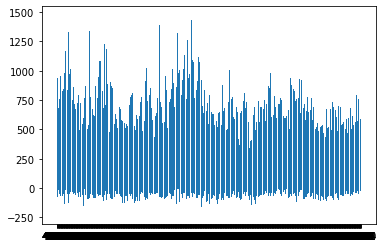

In [45]:
plt.bar(cab_data_df["Date of Travel"],cab_data_df["profit_per_ride"])
plt.show()

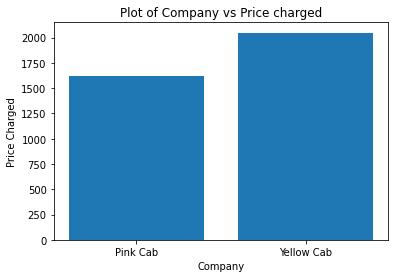

In [29]:
comp = cab_data_df["Company"]
price = cab_data_df["Price Charged"]
plt.bar(comp, price)
plt.xlabel("Company")
plt.ylabel("Price Charged")
plt.title("Plot of Company vs Price charged")
plt.show()

In [30]:
cab_data_df.sort_values(by=["Company"],ascending=False).head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit_per_ride
179696,10221036,42985,Yellow Cab,SAN DIEGO CA,3.45,62.80,48.4380,14.3620
224019,10273788,43072,Yellow Cab,ORANGE COUNTY,11.76,228.36,156.6432,71.7168
224017,10273786,43079,Yellow Cab,ORANGE COUNTY,19.40,343.50,277.0320,66.4680
224016,10273785,43077,Yellow Cab,ORANGE COUNTY,36.63,712.49,452.7468,259.7432
224015,10273784,43077,Yellow Cab,ORANGE COUNTY,29.29,499.75,362.0244,137.7256


In [31]:
cab_data_df.apply(np.max)

Transaction ID          10440107
Date of Travel             43465
Company               Yellow Cab
City               WASHINGTON DC
KM Travelled                48.0
Price Charged            2048.03
Cost of Trip               691.2
profit_per_ride         1463.966
dtype: object

## Customer ID Data

In [3]:
cust_id_path = "DataSets/Customer_ID.csv"
cust_id_df = pd.read_csv(cust_id_path)

In [4]:
cust_id_df.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [5]:
cust_id_df.tail(10)

,Customer ID,Gender,Age,Income (USD/Month)
49161,46512,Male,20,16996
49162,45772,Female,60,3169
49163,46912,Male,51,23225
49164,36141,Female,21,14944
49165,38520,Female,42,19417
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [6]:
cust_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# For numeric attributes
cust_id_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [8]:
# For non numeric attribute
cust_id_df.describe(include=["object"])

,Gender
count,49171
unique,2
top,Male
freq,26562


# Analysis of city data

In [9]:
city_path = "DataSets/City.csv"
city_df = pd.read_csv(city_path)

In [4]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [10]:
city_df.shape

(20, 3)

In [ ]:
sns.barplot(city_df[P])

In [6]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
city_df["Population"] = city_df["Population"].astype
city_df["Population"].dtype

dtype('O')

In [46]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [8]:
def remove_comma(value):
    return value.replace(",","")


In [10]:
remove_comma("8,123,345")

'8123345'

In [11]:
city_df["Users"] = city_df["Users"].apply(remove_comma)

In [ ]:
city_df

In [13]:
city_df["Population"] = city_df["Population"].apply(remove_comma)

AttributeError: 'function' object has no attribute 'replace'

In [ ]:
city_df.head(10)

In [14]:
city_df["Population"].dtype

dtype('O')

In [15]:
city_df["Population"] = city_df["Population"].apply(remove_comma)


AttributeError: 'function' object has no attribute 'replace'

In [16]:
total_users = city_df["Users"].sum()
total_users

' 302149  164468  144132  17675  27247  12994  69995  6133  22157  24701  12421  14978  25063  5712  213609  7044  3643  127001  9270  80021 '

In [17]:
city_df["Population"] = city_df["Population"].astype(np.int64)
city_df["Users"] = city_df["Users"].astype(np.int64)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

In [47]:
city_df["Population"].dtype

dtype('O')

In [81]:
print(city_df["Population"].mean())
print(city_df["Users"].mean())

1231592.0
64520.65


# Analysis of Transaction Id dataset

In [52]:
trans_id_path = "DataSets/Transaction_ID.csv"
trans_id_df = pd.read_csv(trans_id_path)

In [53]:
trans_id_df.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [54]:
trans_id_df.shape

(440098, 3)

In [55]:
trans_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [56]:
trans_id_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


## Joining cab_data_df and trans_id_df

In [84]:
merged_df1 = pd.merge(cab_data_df, trans_id_df,on="Transaction ID", how="inner")

In [85]:
merged_df1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit_per_ride,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card


In [59]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Transaction ID   359392 non-null  int64  
 1   Date of Travel   359392 non-null  object 
 2   Company          359392 non-null  object 
 3   City             359392 non-null  object 
 4   KM Travelled     359392 non-null  float64
 5   Price Charged    359392 non-null  float64
 6   Cost of Trip     359392 non-null  float64
 7   profit_per_ride  359392 non-null  float64
 8   Customer ID      359392 non-null  int64  
 9   Payment_Mode     359392 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 30.2+ MB


In [60]:
merged_df1.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,profit_per_ride,Customer ID
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,19191.652115
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,21012.412463
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,2705.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,7459.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,36078.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,60000.000000
